<a href="https://colab.research.google.com/github/Pranali-25/Codsoft-ML-Internship/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  ***SPAM SMS DETECTION***




Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97

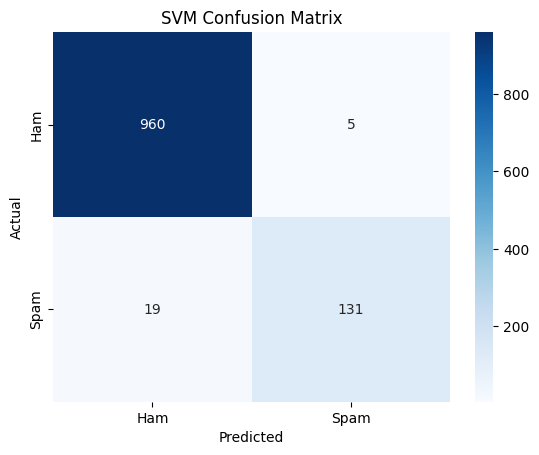


SVM Prediction: Spam
Naive Bayes Prediction: Spam
Logistic Regression Prediction: Spam


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load data
data = pd.read_csv(r"/content/spam.csv", encoding='ISO-8859-1')

# Clean data
data = data[['v1', 'v2']]
data.columns = ['label', 'text']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# SVM
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

#  Predict functions for all 3 models

def predict_with_svm(msg):
    vec = vectorizer.transform([msg])
    prediction = svm.predict(vec)[0]
    return 'Spam' if prediction == 1 else 'Not Spam'

def predict_with_nb(msg):
    vec = vectorizer.transform([msg])
    prediction = nb.predict(vec)[0]
    return 'Spam' if prediction == 1 else 'Not Spam'

def predict_with_lr(msg):
    vec = vectorizer.transform([msg])
    prediction = lr.predict(vec)[0]
    return 'Spam' if prediction == 1 else 'Not Spam'

# Example usage
test_message = "You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810 "
print("\nSVM Prediction:", predict_with_svm(test_message))
print("Naive Bayes Prediction:", predict_with_nb(test_message))
print("Logistic Regression Prediction:", predict_with_lr(test_message))
